In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def generate_histogram(data, col, title, x_label, y_label):
    plt.figure(figsize=(12, 6))
    plt.hist(data[col], bins=20, edgecolor='black')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

In [3]:
def generate_cluster_map(data, cmap="viridis", figsize=(11, 11)):
    correlation_matrix = data.corr()
    fig, ax = plt.subplots(figsize=figsize)
    cax = ax.imshow(correlation_matrix, cmap=cmap, aspect='auto')
    cbar = plt.colorbar(cax)
    ax.set_xticks(np.arange(len(correlation_matrix.columns)))
    ax.set_yticks(np.arange(len(correlation_matrix.columns)))
    ax.set_xticklabels(correlation_matrix.columns, rotation=45, ha="right", fontsize=12)
    ax.set_yticklabels(correlation_matrix.columns, fontsize=12)
    ax.set_title('Cluster Map of Correlation Matrix', fontsize=14)
    plt.show()

In [4]:
def preprocess_data(data):
    data["Survived"] = data["Survived"].map({1: "Survived", 0: "Died"})
    data["Sex"] = data["Sex"].map({"male": "Male", "female": "Female"})
    return data

In [5]:
def generate_line_plot(data, x_col, y_col, label, marker='o'):
    plt.plot(data[x_col], data[y_col], label=label, marker=marker)
    plt.xlabel("Age")
    plt.ylabel("Fare")
    plt.title("Age vs. Fare for Died Passengers")
    plt.legend()
    plt.gca().set_facecolor("#f2f2f2")
    plt.gcf().patch.set_facecolor("#f2f2f2")
    plt.gca().spines[["left", "bottom"]].set_color('black')
    plt.gca().spines[["left", "bottom"]].set_linewidth(2)
    plt.gca().spines[["left", "bottom"]].set_linestyle("solid")
    plt.gca().xaxis.label.set_color('black')
    plt.gca().yaxis.label.set_color('black')
    plt.gca().title.set_color('black')
    plt.show()

In [7]:
df = pd.read_csv('titanic_dataset.csv')
df = preprocess_data(df)

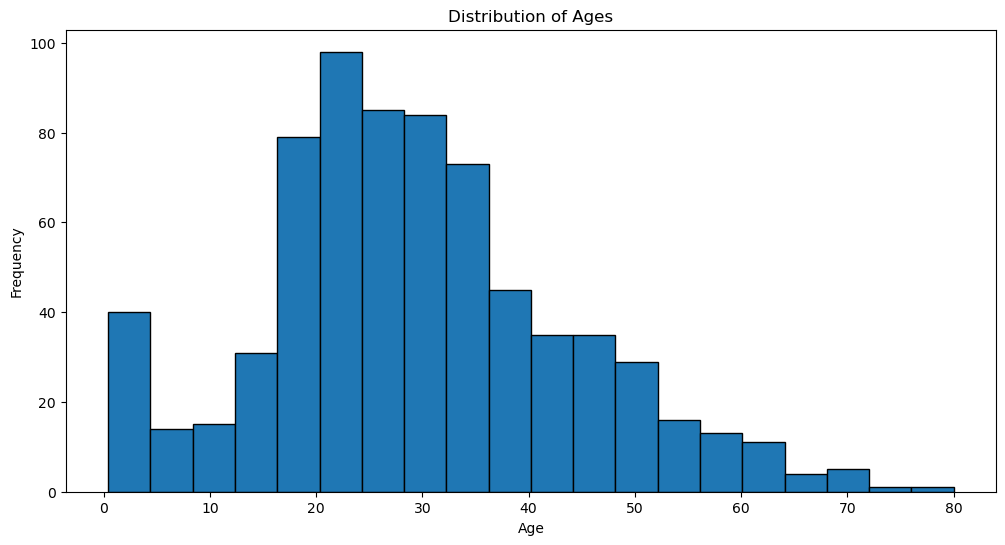

In [8]:
generate_histogram(df, 'Age', 'Distribution of Ages', 'Age', 'Frequency')


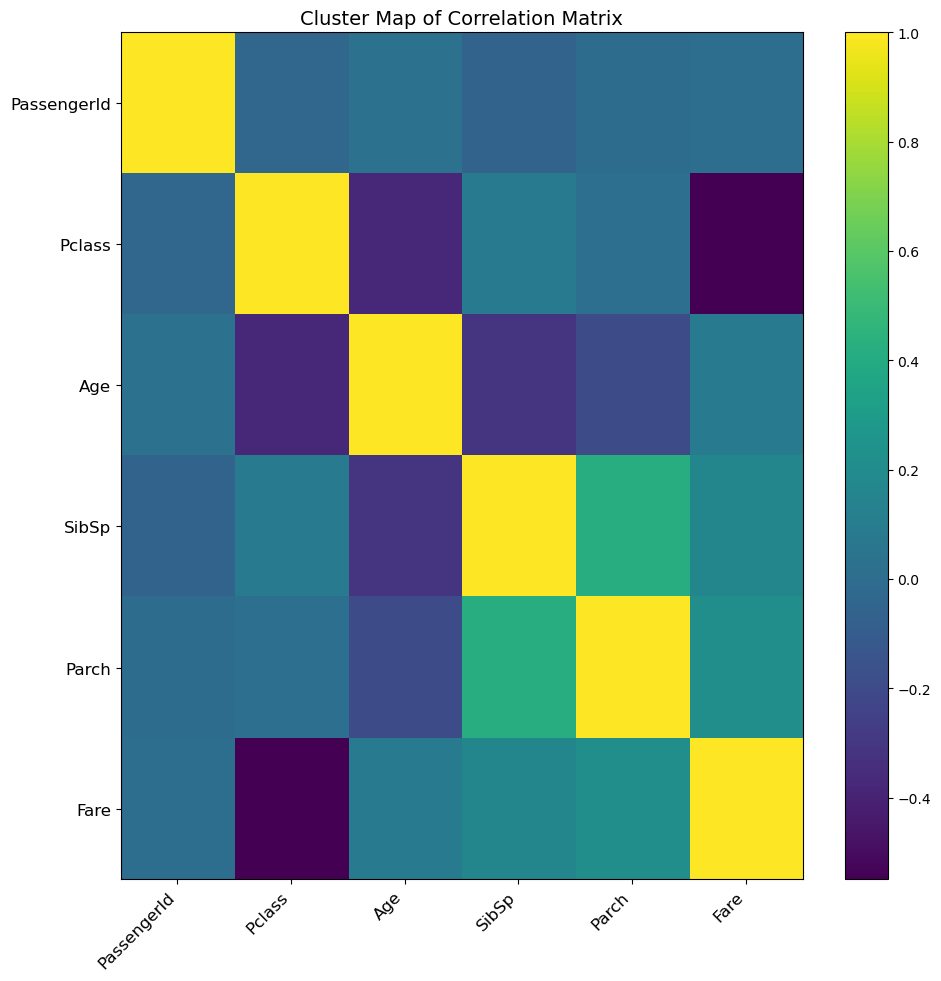

In [9]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
generate_cluster_map(df[numerical_columns], cmap="viridis", figsize=(11, 11))

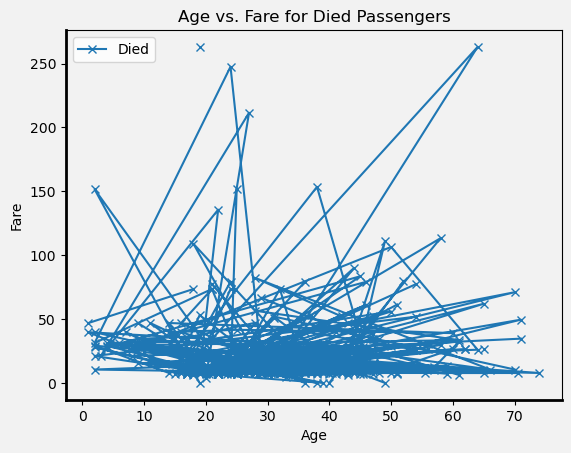

In [10]:
generate_line_plot(df[df["Survived"] == "Died"], "Age", "Fare", "Died", marker='x')